<a href="https://colab.research.google.com/github/jadoon-talal/Artificial-Intelligence/blob/main/AiLabAssignment01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TASK 01**

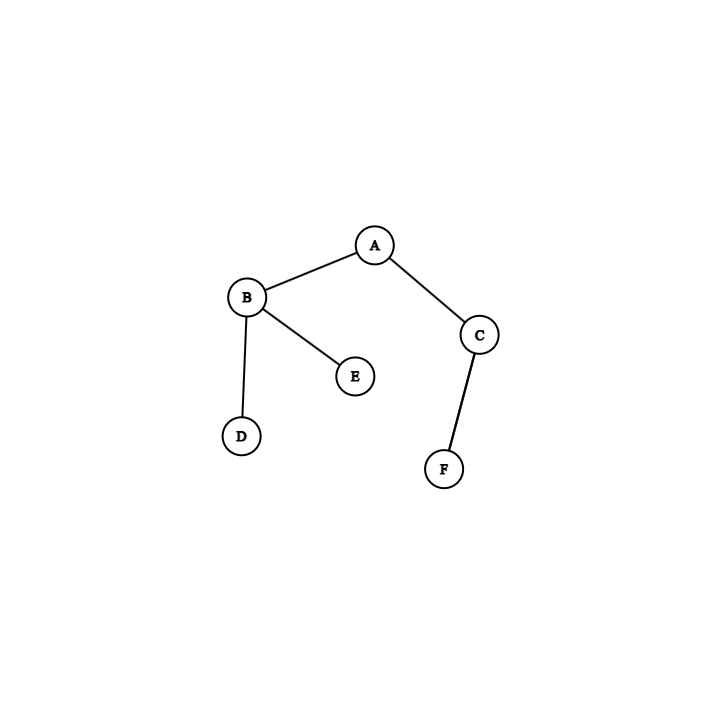

**BFS IMPLEMENTATION**
1. Start at root A, add to queue: [A].
2. Dequeue A, visit it. Enqueue its children B, C: [B, C].
3. Dequeue B, visit it. Enqueue its children D, E: [C, D, E].
4. Dequeue C, visit it. Enqueue its children F, G: [D, E, F, G].
5. Repeat until the queue is empty.

**A->B->C->D->E->F->G**

**DFS IMPLEMENTATION**
1. Start at A, push to stack: [A].
2. Pop A, visit it. Push its right child C, then left child B: [C, B].
3. Pop B, visit it. Push its right child E, then left child D: [C, E, D].
4. Pop D, visit it. Stack becomes [C, E].
5. Continue until the stack is empty.
**A->B->D->E->C->F->G**


**TASK 02**

   Tree Size  BFS Time  DFS Time  BFS Steps  DFS Steps
0       1000  0.000375  0.000274        781        544
1      40000  0.024896  0.008070      39781      14034
2      80000  0.051756  0.016888      79781      28498
3     200000  0.156594  0.096883     199781     137429
4    1000000  0.805864  0.870659     999781     950997


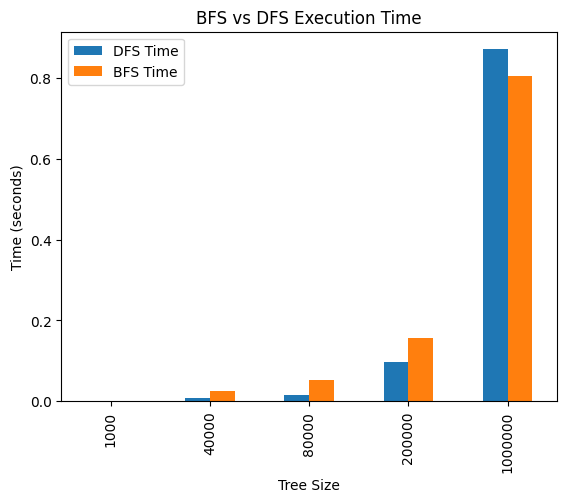

In [4]:
import random
import time
import pandas as pd
import matplotlib.pyplot as plt
from collections import deque

def generate_unique_numbers(size):
    population = range(2 * size)  # Ensure uniqueness
    return random.sample(population, size)

def bfs_search(tree_array, goal):
    queue = deque([0])
    visited_nodes = 0
    while queue:
        idx = queue.popleft()
        visited_nodes += 1
        if tree_array[idx] == goal:
            return visited_nodes
        left = 2 * idx + 1
        if left < len(tree_array):
            queue.append(left)
        right = 2 * idx + 2
        if right < len(tree_array):
            queue.append(right)
    return visited_nodes

def dfs_search(tree_array, goal):
    stack = [0]
    visited_nodes = 0
    while stack:
        idx = stack.pop()
        visited_nodes += 1
        if tree_array[idx] == goal:
            return visited_nodes
        right = 2 * idx + 2
        left = 2 * idx + 1
        if right < len(tree_array):
            stack.append(right)
        if left < len(tree_array):
            stack.append(left)
    return visited_nodes

# Tree sizes to test
sizes = [1000, 40000, 80000, 200000, 1000000]
results = []

for size in sizes:
    data = generate_unique_numbers(size)
    goal = data[-220]  # Or use random: goal = random.choice(data)

    # BFS
    start = time.perf_counter()
    bfs_steps = bfs_search(data, goal)
    bfs_time = time.perf_counter() - start

    # DFS
    start = time.perf_counter()
    dfs_steps = dfs_search(data, goal)
    dfs_time = time.perf_counter() - start

    results.append({
        'Tree Size': size,
        'BFS Time': bfs_time,
        'DFS Time': dfs_time,
        'BFS Steps': bfs_steps,
        'DFS Steps': dfs_steps
    })

df = pd.DataFrame(results)
print(df)

# Plot results
df.plot(x='Tree Size', y=['DFS Time', 'BFS Time'], kind='bar')
plt.title('BFS vs DFS Execution Time')
plt.ylabel('Time (seconds)')
plt.show()

**TASK 03**

**BFS**

In [9]:

from collections import deque

def bfs_shortest_path(graph, start, goal):
    queue = deque([[start]])  # Queue of paths
    visited = set()  # To avoid revisiting cities

    while queue:
        path = queue.popleft()  # Get the first path from queue
        city = path[-1]         # Get the last city from the path

        if city == goal:
            return path  # Found the destination

        if city not in visited:
            visited.add(city)
            for neighbor in graph[city]:
                new_path = list(path)
                new_path.append(neighbor)
                queue.append(new_path)

    return None  # No path found

# Call the function
city_graph = {
    'Islamabad': ['Rawalpindi', 'Lahore', 'Peshawar'],
    'Rawalpindi': ['Islamabad', 'Peshawar', 'Quetta'],
    'Peshawar': ['Islamabad', 'Rawalpindi', 'Quetta'],
    'Lahore': ['Islamabad', 'Multan', 'Quetta'],
    'Multan': ['Lahore', 'Karachi', 'Quetta'],
    'Quetta': ['Rawalpindi', 'Peshawar', 'Multan', 'Karachi'],
    'Karachi': ['Multan', 'Quetta']
}

path = bfs_shortest_path(city_graph, 'Islamabad', 'Karachi')
print("Shortest path from Islamabad to Karachi:")
print(" -> ".join(path))




Shortest path from Islamabad to Karachi:
Islamabad -> Rawalpindi -> Quetta -> Karachi
